In [68]:
import pandas as pd

df = pd.read_csv("dataset/bitext_free_dataset.csv", header=0)
df.columns=['utterance', 'category', 'intent']
df = df[:10000]

categories = []
for category in df['category'].unique():
    categories.append(category)

    
df.head()

,utterance,category,intent
0,"I'm not happy with the service, what do I have...",FEEDBACK,complaint
1,do you mind asking Alexa how I could check my ...,ORDER,track_order
2,"ask alexa how to call customer supoort, please",CONTACT,contact_customer_service
3,"I have an issue making a payment, how can I re...",PAYMENT,payment_issue
4,can u ask alexa where to see the cancellation ...,CANCELLATION_FEE,check_cancellation_fee


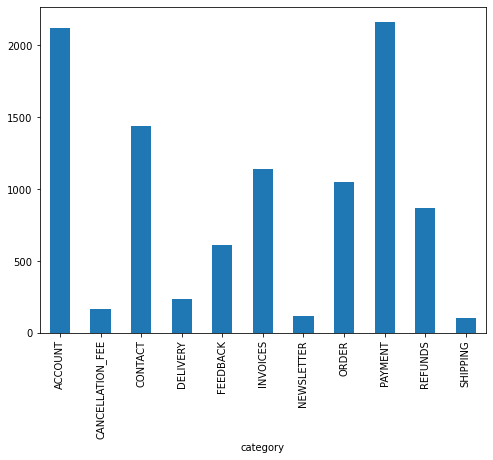

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (8, 6))
df.groupby('category').utterance.count().plot.bar(ylim=0)

---

## Text Preprocessing

In this section, we use text preprocessing techniques to remove words or characters that interfere or add no value to our text analysis. Here, the text preprocessing code converts text to lower case, removes punctuation, tokenises sentences into individual words (tokens) and removes stop words.

### To Do
* Spell checking
* Remove profanity
* Stemming
* Lemmatisation

In [55]:
import nltk
import string
import re


stopwords = nltk.corpus.stopwords.words('english')
       
    
def clean_text(text):
    """
    Convert text to lower case and remove punctuation
    """
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    return text

def tokenize_text(text):
    """
    Break sentences into individual tokens and remove stop words
    """
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [56]:
from sklearn.model_selection import train_test_split

x = df.utterance
y = df.category

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 42)

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

nb = Pipeline([('vect', CountVectorizer(preprocessor= clean_text, tokenizer= tokenize_text)),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names= categories))

random_df = df.sample()
print(nb.predict([random_df['utterance']]))
random_df.head()

accuracy 0.9846666666666667
                  precision    recall  f1-score   support

        FEEDBACK       0.98      0.99      0.98       637
           ORDER       1.00      0.97      0.99        40
         CONTACT       1.00      1.00      1.00       430
         PAYMENT       0.96      1.00      0.98        66
CANCELLATION_FEE       1.00      1.00      1.00       182
         ACCOUNT       0.97      1.00      0.98       339
        INVOICES       1.00      0.71      0.83        35
         REFUNDS       0.99      0.98      0.99       331
        DELIVERY       0.98      1.00      0.99       645
      NEWSLETTER       0.99      0.98      0.99       257
        SHIPPING       1.00      0.71      0.83        38

        accuracy                           0.98      3000
       macro avg       0.99      0.94      0.96      3000
    weighted avg       0.98      0.98      0.98      3000

['INVOICES']


,utterance,category,intent
5391,help me see my invoices,INVOICES,check_invoices


In [58]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(preprocessor= clean_text, tokenizer= tokenize_text)),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))])

sgd.fit(x_train, y_train)

y_pred = sgd.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names= categories))

random_df = df.sample()
print(sgd.predict([random_df['utterance']]))
random_df.head()

accuracy 0.9956666666666667
                  precision    recall  f1-score   support

        FEEDBACK       1.00      1.00      1.00       637
           ORDER       0.98      1.00      0.99        40
         CONTACT       1.00      1.00      1.00       430
         PAYMENT       0.96      1.00      0.98        66
CANCELLATION_FEE       1.00      1.00      1.00       182
         ACCOUNT       0.99      1.00      0.99       339
        INVOICES       1.00      1.00      1.00        35
         REFUNDS       0.99      1.00      1.00       331
        DELIVERY       1.00      1.00      1.00       645
      NEWSLETTER       1.00      0.98      0.99       257
        SHIPPING       1.00      1.00      1.00        38

        accuracy                           1.00      3000
       macro avg       0.99      1.00      0.99      3000
    weighted avg       1.00      1.00      1.00      3000

['PAYMENT']


,utterance,category,intent
4703,I got an error message when I attempted to mak...,PAYMENT,payment_issue


In [59]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(preprocessor= clean_text, tokenizer= tokenize_text)),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression(n_jobs= 1, C=1e5))])

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names= categories))

random_df = df.sample()
print(logreg.predict([random_df['utterance']]))
random_df.head()

accuracy 0.9963333333333333
                  precision    recall  f1-score   support

        FEEDBACK       1.00      1.00      1.00       637
           ORDER       1.00      1.00      1.00        40
         CONTACT       1.00      1.00      1.00       430
         PAYMENT       0.96      1.00      0.98        66
CANCELLATION_FEE       1.00      1.00      1.00       182
         ACCOUNT       0.99      1.00      0.99       339
        INVOICES       1.00      1.00      1.00        35
         REFUNDS       0.99      0.99      0.99       331
        DELIVERY       1.00      1.00      1.00       645
      NEWSLETTER       1.00      0.98      0.99       257
        SHIPPING       1.00      1.00      1.00        38

        accuracy                           1.00      3000
       macro avg       0.99      1.00      1.00      3000
    weighted avg       1.00      1.00      1.00      3000

['PAYMENT']


,utterance,category,intent
9521,"I want to ese your payment options, what do I ...",PAYMENT,check_payment_methods


---

## Model Persistence

In this section, we use joblib to persist the Logistic Regression model to disk for future use. This is useful because we can load the trained model from disk and make predictions without having to retrain the model.

In [80]:
from joblib import dump, load

# save the Logistic Regression model to disk
dump(logreg, 'models/logreg.joblib')

['models/logreg.joblib']

In [79]:
# load Logistic Regression model from disk and make prediction
logreg = load('models/logreg.joblib')

y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names= categories))

random_df = df.sample()
print(logreg.predict([random_df['utterance']]))
random_df.head()

accuracy 0.9963333333333333
                  precision    recall  f1-score   support

        FEEDBACK       1.00      1.00      1.00       637
           ORDER       1.00      1.00      1.00        40
         CONTACT       1.00      1.00      1.00       430
         PAYMENT       0.96      1.00      0.98        66
CANCELLATION_FEE       1.00      1.00      1.00       182
         ACCOUNT       0.99      1.00      0.99       339
        INVOICES       1.00      1.00      1.00        35
         REFUNDS       0.99      0.99      0.99       331
        DELIVERY       1.00      1.00      1.00       645
      NEWSLETTER       1.00      0.98      0.99       257
        SHIPPING       1.00      1.00      1.00        38

        accuracy                           1.00      3000
       macro avg       0.99      1.00      1.00      3000
    weighted avg       1.00      1.00      1.00      3000

['ACCOUNT']


,utterance,category,intent
6976,"my profile's been hacked, and I need help gett...",ACCOUNT,recover_password
